In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"visalidmscaiml","key":"a2481cf7cabea3c1baeb55d1d49b39a1"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d jjacostupa/condition-monitoring-of-hydraulic-systems


Dataset URL: https://www.kaggle.com/datasets/jjacostupa/condition-monitoring-of-hydraulic-systems
License(s): unknown
 89% 81.0M/91.1M [00:01<00:00, 71.5MB/s]
100% 91.1M/91.1M [00:01<00:00, 85.2MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip -o "/path/to/condition-monitoring-of-hydraulic-systems.zip" -d "/content/drive/My Drive/hydraulic_systems/"


unzip:  cannot find or open /path/to/condition-monitoring-of-hydraulic-systems.zip, /path/to/condition-monitoring-of-hydraulic-systems.zip.zip or /path/to/condition-monitoring-of-hydraulic-systems.zip.ZIP.


In [ ]:
import os
# Replace with the actual path where you extracted the dataset
dataset_path = '/content/drive/My Drive/hydraulic_systems'
files = os.listdir(dataset_path)
print(files)


['CP.txt', 'CE.txt', 'EPS1.txt', 'FS1.txt', 'PS1.txt', 'FS2.txt', 'PS2.txt', 'PS3.txt', 'PS4.txt', 'PS5.txt', 'PS6.txt', 'SE.txt', 'TS4.txt', 'documentation.txt', 'TS1.txt', 'TS3.txt', 'profile.txt', 'TS2.txt', 'VS1.txt', 'description.txt']


In [ ]:
import pandas as pd
import numpy as np

# Load data from the .txt files (replace with actual paths)
ce = pd.read_csv('/content/drive/My Drive/hydraulic_systems/CE.txt', header=None, delimiter='\s+')  # '\s+' handles space or tab delimiters
cp = pd.read_csv('/content/drive/My Drive/hydraulic_systems/CP.txt', header=None, delimiter='\s+')
eps1 = pd.read_csv('/content/drive/My Drive/hydraulic_systems/EPS1.txt', header=None, delimiter='\s+')
fs1 = pd.read_csv('/content/drive/My Drive/hydraulic_systems/FS1.txt', header=None, delimiter='\s+')
fs2 = pd.read_csv('/content/drive/My Drive/hydraulic_systems/FS2.txt', header=None, delimiter='\s+')
ps1 = pd.read_csv('/content/drive/My Drive/hydraulic_systems/PS1.txt', header=None, delimiter='\s+')
ps2 = pd.read_csv('/content/drive/My Drive/hydraulic_systems/PS2.txt', header=None, delimiter='\s+')
ps3 = pd.read_csv('/content/drive/My Drive/hydraulic_systems/PS3.txt', header=None, delimiter='\s+')
ps4 = pd.read_csv('/content/drive/My Drive/hydraulic_systems/PS4.txt', header=None, delimiter='\s+')
ps5 = pd.read_csv('/content/drive/My Drive/hydraulic_systems/PS5.txt', header=None, delimiter='\s+')
ps6 = pd.read_csv('/content/drive/My Drive/hydraulic_systems/PS6.txt', header=None, delimiter='\s+')
se = pd.read_csv('/content/drive/My Drive/hydraulic_systems/SE.txt', header=None, delimiter='\s+')
ts1 = pd.read_csv('/content/drive/My Drive/hydraulic_systems/TS1.txt', header=None, delimiter='\s+')
ts2 = pd.read_csv('/content/drive/My Drive/hydraulic_systems/TS2.txt', header=None, delimiter='\s+')
ts3 = pd.read_csv('/content/drive/My Drive/hydraulic_systems/TS3.txt', header=None, delimiter='\s+')
ts4 = pd.read_csv('/content/drive/My Drive/hydraulic_systems/TS4.txt', header=None, delimiter='\s+')
vs1 = pd.read_csv('/content/drive/My Drive/hydraulic_systems/VS1.txt', header=None, delimiter='\s+')
profile = pd.read_csv('/content/drive/My Drive/hydraulic_systems/profile.txt', delimiter='\t')



# Check the first few rows to confirm it's loaded correctly
print(ce.head())
print(ps1.head())

       0       1       2       3       4       5       6       7       8   \
0  47.202  47.273  47.250  47.332  47.213  47.372  47.273  47.438  46.691   
1  29.208  28.822  28.805  28.922  28.591  28.643  28.216  27.812  27.514   
2  23.554  23.521  23.527  23.008  23.042  23.052  22.658  22.952  22.908   
3  21.540  21.419  21.565  20.857  21.052  21.039  20.926  20.912  20.989   
4  20.460  20.298  20.350  19.867  19.997  19.972  19.924  19.813  19.691   

       9   ...      50      51      52      53      54      55      56  \
0  46.599  ...  31.554  30.953  30.639  30.561  30.368  30.224  29.790   
1  27.481  ...  23.995  24.328  24.283  23.877  23.816  23.933  23.354   
2  22.359  ...  21.711  21.564  21.564  21.526  21.753  21.749  21.802   
3  20.882  ...  20.687  20.703  20.295  20.482  20.600  20.547  20.708   
4  19.634  ...  19.887  19.919  19.696  19.634  19.747  20.005  19.919   

       57      58      59  
0  29.261  29.287  28.866  
1  23.483  23.320  23.588  
2  21.58

In [ ]:
# Concatenate the DataFrames side by side (assuming they have the same number of rows)
df = pd.concat([ce,cp,eps1,fs1,fs2,ps1,ps2,ps3,ps4,ps5,ps6,se,ts1,ts2,ts3,ts4,vs1], axis=1)

profile.columns = ['Cooler condition', 'Valve condition', 'Pump Leakage', 'Accumulator Pressure', 'Stable Flag']

y = profile['Cooler condition']  # Choose a target column from the profile file

# Ensure that the feature data (X) and target data (y) have the same number of rows
print(f"Feature data shape: {df.shape}, Target data shape: {y.shape}")

# Drop the last row of the feature data to match the target data size
df = df.iloc[:-1, :]

# Now check the shapes again
print(f"Feature data shape after adjustment: {df.shape}")
print(f"Target data shape: {y.shape}")

# Continue with the training process
# Train and test the Random Forest model as before...



Feature data shape: (2205, 43680), Target data shape: (2204,)
Feature data shape after adjustment: (2204, 43680)
Target data shape: (2204,)


In [ ]:
print(df.isnull().sum())  # Check for missing values in features
print(y.isnull().sum())   # Check for missing values in target data

0     0
1     0
2     0
3     0
4     0
     ..
55    0
56    0
57    0
58    0
59    0
Length: 43680, dtype: int64
0


In [ ]:
# Extracting basic statistics as features
features = pd.DataFrame({
    'mean': df.mean(axis=0),
    'std': df.std(axis=0),
    'max': df.max(axis=0),
    'min': df.min(axis=0),
    'skew': df.apply(lambda x: x.skew(), axis=0),
    'kurtosis': df.apply(lambda x: x.kurtosis(), axis=0)
})

# Display the extracted features
print(features)

         mean        std     max     min      skew  kurtosis
0   31.318605  11.530096  48.136  17.356  0.471345 -1.506116
1   31.357721  11.510590  48.057  17.552  0.470363 -1.506083
2   31.388923  11.502195  48.124  17.440  0.469589 -1.505721
3   31.395590  11.502250  48.112  17.416  0.469652 -1.505674
4   31.388382  11.519000  48.159  17.392  0.470238 -1.505642
..        ...        ...     ...     ...       ...       ...
55   0.575407   0.051012   0.865   0.495  1.450476  3.426124
56   0.573578   0.050399   0.871   0.495  1.540788  3.896105
57   0.572587   0.049652   0.867   0.499  1.547379  3.885283
58   0.571517   0.049362   0.868   0.495  1.563577  3.932327
59   0.574653   0.049314   0.873   0.501  1.686164  4.730381

[43680 rows x 6 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (e.g., scaling the data)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Check the first few rows of the scaled data
print(df_scaled.head())

         0         1         2         3         4         5         6   \
0  1.377872  1.382978  1.379274  1.385818  1.374096  1.387801  1.377653   
1 -0.183093 -0.220345 -0.224697 -0.215102 -0.242904 -0.235912 -0.270573   
2 -0.673574 -0.680982 -0.683670 -0.729378 -0.724740 -0.720625 -0.751280   
3 -0.848286 -0.863637 -0.854285 -0.916428 -0.897537 -0.895142 -0.901080   
4 -0.941976 -0.961048 -0.959941 -1.002517 -0.989145 -0.987646 -0.987742   

         7         8         9   ...        50        51        52        53  \
0  1.391482  1.330503  1.332341  ... -0.472561 -0.497043 -0.705285 -0.557018   
1 -0.304126 -0.327386 -0.325188  ... -0.455677 -0.586955 -0.650265 -0.727112   
2 -0.724011 -0.725584 -0.769265  ... -0.658282 -0.640902 -0.741966 -0.538118   
3 -0.900259 -0.891486 -0.897321  ... -0.556980 -0.748796 -0.558563 -0.746011   
4 -0.995208 -1.003700 -1.005522  ... -0.607631 -0.604937 -0.723626 -0.575917   

         54        55        56        57        58        59  
0 -0

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

print(f"Training feature shape: {X_train.shape}")
print(f"Test feature shape: {X_test.shape}")


Training feature shape: (1763, 43680)
Test feature shape: (441, 43680)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = rf.predict(X_test)

# Check the first few predictions
print(y_pred[:10])


[ 20   3 100  20 100   3  20   3   3  20]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 1.0000
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       157
          20       1.00      1.00      1.00       127
         100       1.00      1.00      1.00       157

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df_scaled and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with regularization parameters
rf_reg = RandomForestClassifier(
    n_estimators=200,  # Number of trees
    max_depth=10,  # Limit tree depth (regularization)
    min_samples_split=4,  # Minimum samples for split (regularization)
    min_samples_leaf=2,  # Minimum samples for leaf (regularization)
    max_features='sqrt',  # Limit the number of features considered for each split (regularization)
    bootstrap=True,  # Use bootstrap sampling (can help reduce variance)
    random_state=42
)

# Fit the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred = rf_reg.predict(X_test)



In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_reg, df_scaled, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.89795918 1.         1.         1.         1.        ]
Average cross-validation score: 0.9796


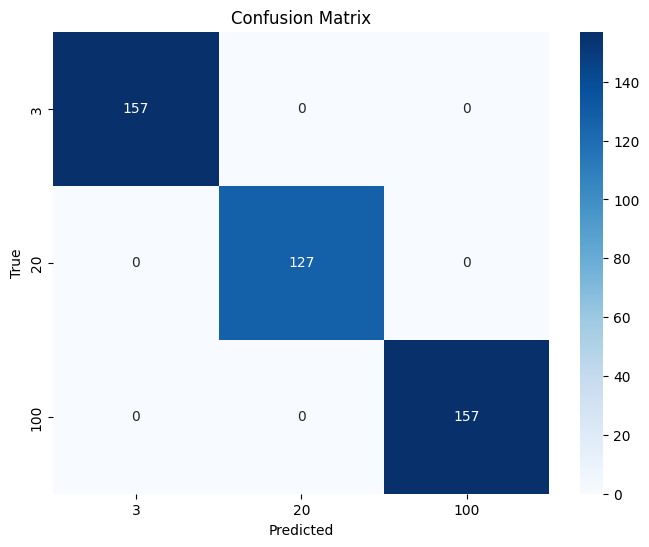

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


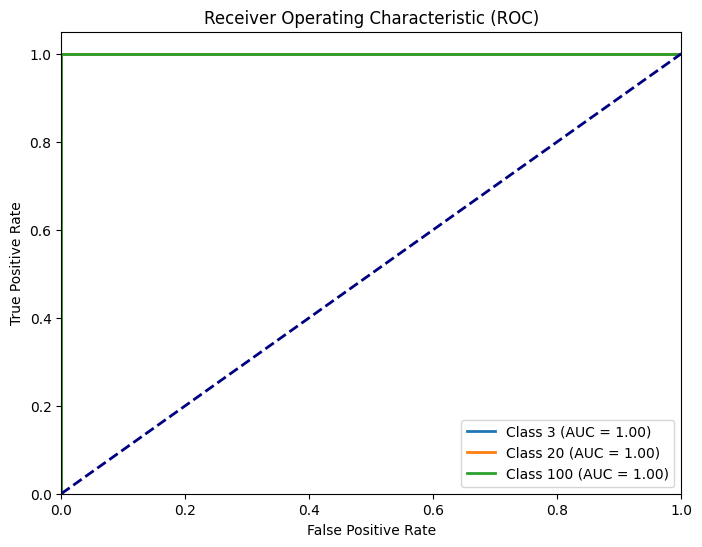

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted probabilities instead of class labels
y_prob = rf.predict_proba(X_test)

# Binarize the true labels for multi-class AUC calculation
lb = LabelBinarizer()
y_bin = lb.fit_transform(y_test)

# Initialize variables for plotting ROC curves for each class
fpr = {}
tpr = {}
roc_auc = {}

# Calculate ROC curve and AUC for each class
for i in range(y_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure(figsize=(8, 6))
for i in range(y_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


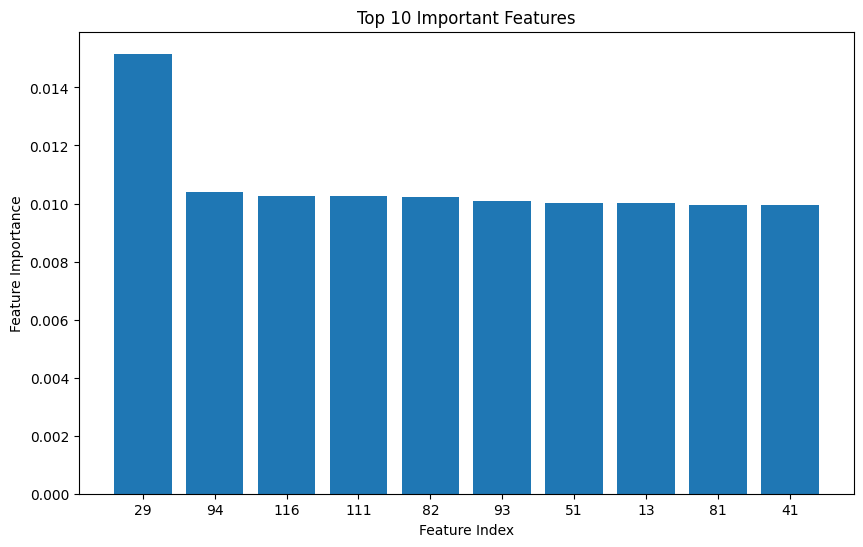

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.title('Top 10 Important Features')
plt.bar(range(10), feature_importances[indices][:10], align='center')
plt.xticks(range(10), indices[:10])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.show()


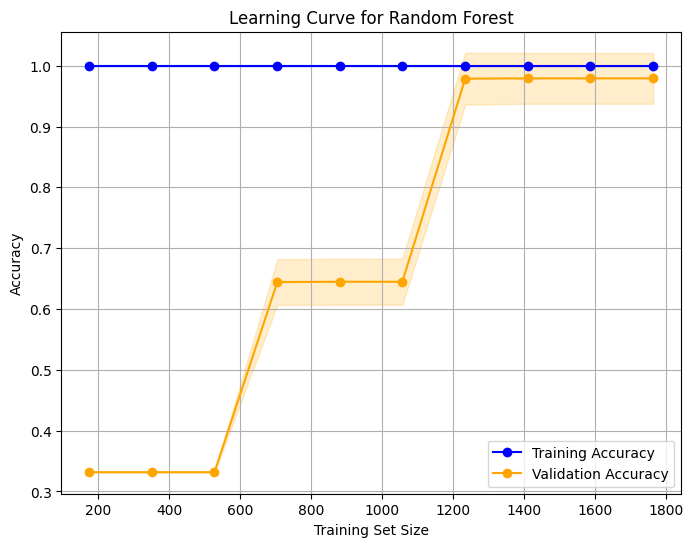

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    rf, df_scaled, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Validation Accuracy')

# Add standard deviation shading
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')

# Plot formatting
plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()